In [1]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import figure

# Data 

In [2]:
data_1 = ('..\Project\AgERA5_4params_graz.csv')


In [3]:
df_1 = pd.read_csv(data_1,index_col = 0)
df_1.index = pd.to_datetime(df_1.index)


FileNotFoundError: [Errno 2] No such file or directory: '..\\Project\\AgERA5_4params_graz.csv'

In [ ]:
data_2 = (r'..\Project\new_5sta(DNOWS)_3com(NO2,PM10K,O3)_year2010_TemporalDummies_Ox_holidays_meteo.csv')

In [ ]:
df_2 = pd.read_csv(data_2,index_col = 0)
df_2.index = pd.to_datetime(df_2.index)

In [ ]:
df_1 = df_1['1-1-2010':'7-7-2021']


In [ ]:
df_2


# Merge 

In [ ]:
data = pd.concat([df_1, df_2],axis = 1, join='inner')
data.isnull().sum()

In [ ]:
test = data.filter(regex='West')
test.isnull().sum()

# Podaci za model 

In [ ]:
# pronalazak nan vrijednosti i zamjena 
data = data.fillna(method='bfill')
data.isnull().sum()

In [ ]:
#data.columns

In [ ]:
features= ['Cloud_Cover_Mean', 'Temperature_Air_2m_Max_Day_Time',
       'Temperature_Air_2m_Min_Night_Time', 'Wind_Speed_10m_Mean','year', 'dayofyear', 'month_Apr',
       'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul',
       'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'month_Sep', 'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'season_fall', 'season_spring', 'season_summer',
       'season_winter','holiday', 'holiday_school']
data_s_features = data[features]

# Funkcija 


In [ ]:
def podaci (*arguments): 
    if arguments == 1:
        df = data.filter(regex=arguments)
        d = pd.concat([df, data_s_features],axis = 1, join='inner')
        return d
    else:
        d={}
        for i in arguments:
            y=y_data = [i]
            df = data.filter(regex=i)
            data_s_postaje = pd.DataFrame()
            data_s_postaje  = pd.concat([df, data_s_features],axis = 1, join='inner')
            d[i] = data_s_postaje
        return d 

In [ ]:
postaje = podaci('Nord','DonBosco','Sud','West','Ost') #postaje = ['Nord','DonBosco','Sud','West','Ost']   
y = ['N_NO2','D_NO2','S_NO2','W_NO2','O_NO2']
z = ['Nord','DonBosco','Sud','West','Ost']


C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\pandas\core\indexes\base.py:6393: UserWarning: Parsing '31-12-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  label = self._maybe_cast_slice_bound(label, side)


Rezultati s podacima s lokalnih postaja N_NO2
R-squared scores: 0.64


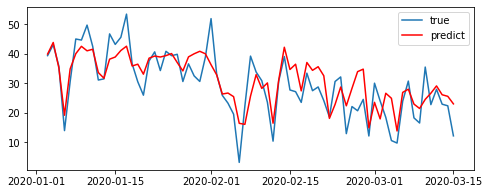

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\pandas\core\indexes\base.py:6393: UserWarning: Parsing '31-12-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  label = self._maybe_cast_slice_bound(label, side)


Rezultati s podacima s lokalnih postaja D_NO2
R-squared scores: 0.21


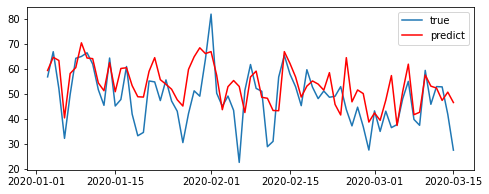

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\pandas\core\indexes\base.py:6393: UserWarning: Parsing '31-12-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  label = self._maybe_cast_slice_bound(label, side)


Rezultati s podacima s lokalnih postaja S_NO2
R-squared scores: 0.42


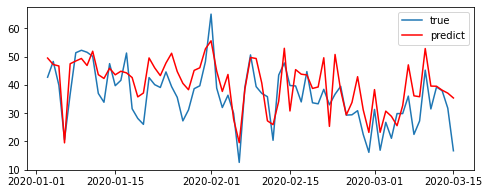

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\pandas\core\indexes\base.py:6393: UserWarning: Parsing '31-12-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  label = self._maybe_cast_slice_bound(label, side)


Rezultati s podacima s lokalnih postaja W_NO2
R-squared scores: 0.72


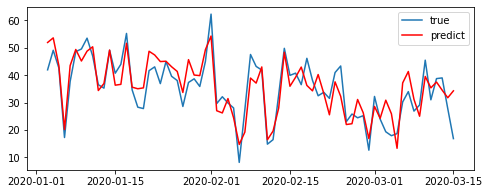

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\pandas\core\indexes\base.py:6393: UserWarning: Parsing '31-12-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  label = self._maybe_cast_slice_bound(label, side)


Rezultati s podacima s lokalnih postaja O_NO2
R-squared scores: 0.27


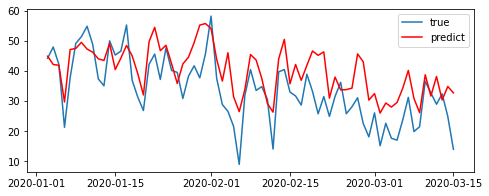

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\pandas\core\indexes\base.py:6393: UserWarning: Parsing '31-12-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  label = self._maybe_cast_slice_bound(label, side)


Rezultati s podacima bez lokalnih postaja N_NO2
R-squared scores: 0.02


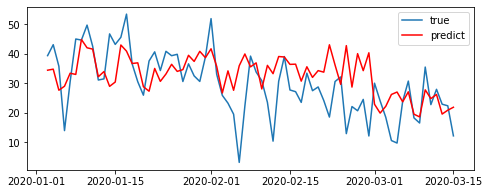

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\pandas\core\indexes\base.py:6393: UserWarning: Parsing '31-12-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  label = self._maybe_cast_slice_bound(label, side)


Rezultati s podacima bez lokalnih postaja D_NO2
R-squared scores: -0.38


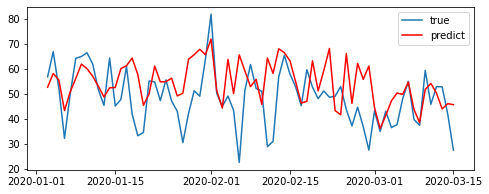

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\pandas\core\indexes\base.py:6393: UserWarning: Parsing '31-12-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  label = self._maybe_cast_slice_bound(label, side)


Rezultati s podacima bez lokalnih postaja S_NO2
R-squared scores: -0.08


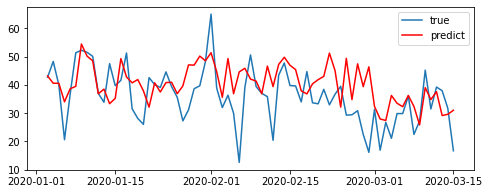

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\pandas\core\indexes\base.py:6393: UserWarning: Parsing '31-12-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  label = self._maybe_cast_slice_bound(label, side)


Rezultati s podacima bez lokalnih postaja W_NO2
R-squared scores: -0.15


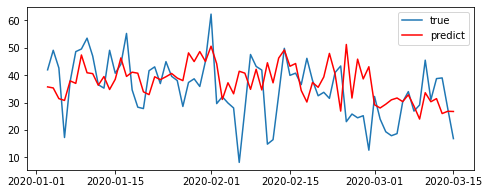

C:\Users\vpetric\Anaconda3\envs\pollution\lib\site-packages\pandas\core\indexes\base.py:6393: UserWarning: Parsing '31-12-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  label = self._maybe_cast_slice_bound(label, side)


Rezultati s podacima bez lokalnih postaja O_NO2
R-squared scores: -0.15


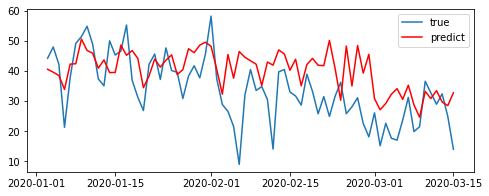

In [34]:
for yt,z1 in zip(y,z):
        Y = data[yt]
        X = postaje[z1]
        X_train = X[:'31-12-2019']
        X_test = X['01-03-2020':'03-15-2020']
        Y_train = Y[:'31-12-2019']
        Y_test = Y['01-03-2020':'03-15-2020'] 
        model = RandomForestRegressor(n_estimators = 100)
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        r2 = r2_score(Y_test, predictions)
        print(f'Rezultati s podacima s lokalnih postaja {yt}')
        print('R-squared scores:', round(r2, 2))        
        Y_pred = pd.Series(predictions, index= Y_test.index)
        plt.figure(figsize=(8, 3))
        plt.plot(Y_test)
        plt.plot(Y_pred, 'r')
        plt.legend(['true', 'predict'])
        plt.show()

for yt in y:
    
    Y = data[yt]
    X = data_s_features
    X_train = X[:'31-12-2019']
    X_test = X['01-03-2020':'03-15-2020']
    Y_train = Y[:'31-12-2019']
    Y_test = Y['01-03-2020':'03-15-2020'] 
    model = RandomForestRegressor(n_estimators = 100)
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    r2 = r2_score(Y_test, predictions)
    print(f'Rezultati s podacima bez lokalnih postaja {yt}')
    print('R-squared scores:', round(r2, 2))
    Y_pred = pd.Series(predictions, index= Y_test.index)
    plt.figure(figsize=(8, 3))
    plt.plot(Y_test)
    plt.plot(Y_pred, 'r')
    plt.legend(['true', 'predict'])
    plt.show()